In [63]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

In [64]:
# 파일 로딩
FILE = './data/diabetes.csv'

df = pd.read_csv(FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
# 결측치 개수 파악
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
# 기술 통계 정보 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
# 각 컬럼당 0값을 제외한 컬럼의 평균 값으로 0 값 채우기
df.Glucose[df['Glucose']==0] = df.Glucose[df['Glucose']!=0].mean()
df.BloodPressure[df['BloodPressure']==0] = df.BloodPressure[df['BloodPressure']!=0].mean()
df.SkinThickness[df['SkinThickness']==0] = df.SkinThickness[df['SkinThickness']!=0].mean()
df.BMI[df['BMI']==0] = df.BMI[df['BMI']!=0].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_4356\333754670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Glucose[df['Glucose']==0] = df.Glucose[df['Glucose']!=0].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_4356\333754670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BloodPressure[df['BloodPressure']==0] = df.BloodPressure[df['BloodPressure']!=0].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_4356\333754670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

### [1] 데이터 준비

In [68]:
X = df['Insulin']
y = df['Outcome'] 

In [69]:
# 학습에 사용할 수 있도록 형변환
arrX = np.array(X).reshape(-1, 1)
arrY = np.array(y).reshape(-1, 1)

In [70]:
# 데이터 체크
print('arrX : ', arrX.shape, 'arrY : ', arrY.shape)

arrX :  (768, 1) arrY :  (768, 1)


### [2] 데이터 확인 => 시각화

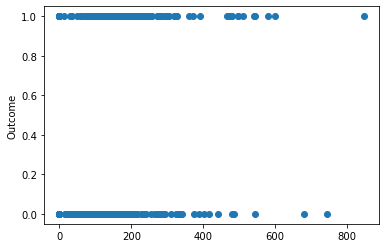

In [71]:
# 현재 데이터 시각화
plt.scatter(X, y)
plt.xlabel('')
plt.ylabel('Outcome')
plt.show()

### [3] 모델 생성 & 학습

In [72]:
model = LogisticRegression()

In [73]:
# 학습
model.fit(arrX, arrY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [75]:
# 학습 후 설정된 속성
print('분류 종류 : ', model.classes_)
print('가중치 값 : ', model.coef_)
print('절 편  값 : ', model.intercept_)
print('특성 갯수 : ', model.n_features_in_)

분류 종류 :  [0 1]
가중치 값 :  [[0.00229885]]
절 편  값 :  [-0.81451003]
특성 갯수 :  1


### [4] 평가 => score() 학습용 데이터 점수, 테스트용 데티어 점수
---
- 2개 점수 비교해서 과대적합, 과소적합 체크

In [76]:
model.score(arrX, arrY)

0.6575520833333334

### [5] 테스트 => predict() : 새로운 데이터로 진행

In [78]:
preY = model.predict(arrX)

preY

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
# 1개 데이터
preY = model.predict([[50]])
print('예측결과 : ', preY)

예측결과 :  [0]


In [90]:
probaY = model.predict_proba([[50]])
print('분류항목 : ', model.classes_)
print('예측확률 : ', probaY)

분류항목 :  [0 1]
예측확률 :  [[0.66809189 0.33190811]]
